In [17]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Charger les données
data = pd.read_csv("../data/fic_epita_kantar_codes.csv", sep=";", encoding="latin-1")  # ou encoding="iso-8859-1"
variables_orange = ["A9_1_slice",
                    "A9_2_slice",
                    "A9_3_slice",
                    "A9_4_slice",
                    "A9_5_slice",
                    "A9_6_slice",
                    "A9_7_slice",
                    "A9_8_slice",
                    "A9_9_slice",
                    "A9_10_slice",
                    "A9_11_slice",
                    "A9_12_slice",
                    "A9_13_slice",
                    "A9_14_slice",
                    "A9_15_slice",
                    "A9_16_slice",
                    "A10_1_slice",
                    "A10_2_slice",
                    "A10_3_slice",
                    "A10_4_slice",
                    "A10_5_slice",
                    "A10_6_slice",
                    "A10_7_slice",
                    "A10_8_slice",
                    "A11_1_slice",
                    "A11_2_slice",
                    "A11_3_slice",
                    "A11_4_slice",
                    "A11_5_slice",
                    "A11_6_slice",
                    "A11_7_slice",
                    "A11_8_slice",
                    "A11_9_slice",
                    "A11_10_slice",
                    "A11_11_slice",
                    "A11_12_slice",
                    "A11_13_slice",
                    ]
variables_vert = ["A11", "A12", "A13", "A14", "A4", "A5", "A5bis",
                  "A8_1_slice", "A8_2_slice", "A8_3_slice", "A8_4_slice",
                  "B1_1_slice", "B1_2_slice", "B2_1_slice", "B2_2_slice",
                  "B3", "B4", "B6", "C1_1_slice", "C1_2_slice", "C1_3_slice", 
                  "C1_4_slice", "C1_5_slice", "C1_6_slice", "C1_7_slice", 
                  "C1_8_slice", "C1_9_slice"]

In [3]:
data_orange = data[variables_orange]
data_vert = data[variables_vert]
print(data_orange.shape)
print(data_vert.shape)

(5000, 37)
(5000, 27)


In [4]:
#print(data_vert.head())
# If a column has NaN values, fill them with the mean of the column
data_vert = data_vert.fillna(data_vert.mean())
print(data_vert.head())


   A11  A12  A13  A14  A4        A5     A5bis  A8_1_slice  A8_2_slice  \
0    1    0    0    0   1  2.000000  1.821206           2           2   
1    1    0    0    0   1  5.000000  1.821206           2           0   
2    1    0    0    0   1  2.000000  1.821206           5           5   
3    1    1    1    0   1  1.000000  1.821206           2           3   
4    0    1    0    0   2  2.326399  1.000000           1           1   

   A8_3_slice  ...  B6  C1_1_slice  C1_2_slice  C1_3_slice  C1_4_slice  \
0           2  ...   3           2           2           2           2   
1           0  ...   3           4           4           4           4   
2           1  ...   4           4           4           4           4   
3           2  ...   4           4           4           5           5   
4           1  ...   3           4           4           4           4   

   C1_5_slice  C1_6_slice  C1_7_slice  C1_8_slice  C1_9_slice  
0           2           2           2           2   

In [10]:

# Standardiser les données
scaler = StandardScaler()
data_orange_scaled = scaler.fit_transform(data_orange)
data_vert_scaled = scaler.fit_transform(data_vert)


# Fonction pour effectuer le clustering
def perform_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    silhouette = silhouette_score(data, clusters)
    return clusters, kmeans, silhouette

# Clustering pour les deux groupes de variables
clusters_orange, kmeans_orange, silhouette_orange = perform_clustering(data_orange_scaled, 4)
clusters_vert, kmeans_vert, silhouette_vert = perform_clustering(data_vert_scaled, 5)

print(f"Silhouette Score (Orange): {silhouette_orange}")
print(f"Silhouette Score (Vert): {silhouette_vert}")




Silhouette Score (Orange): 0.10744180434504633
Silhouette Score (Vert): 0.1455179980633828


Analyse des clusters pour les variables orange:
Clusters: 1, Distortion: 37.00, Inertia: 185000.00
Clusters: 2, Distortion: 28.20, Inertia: 141003.38
Clusters: 3, Distortion: 25.12, Inertia: 125624.53
Clusters: 4, Distortion: 23.83, Inertia: 119154.01
Clusters: 5, Distortion: 23.01, Inertia: 115054.34
Clusters: 6, Distortion: 22.37, Inertia: 111872.44
Clusters: 7, Distortion: 21.91, Inertia: 109531.29
Clusters: 8, Distortion: 21.52, Inertia: 107604.66
Clusters: 9, Distortion: 21.20, Inertia: 105975.79
Clusters: 10, Distortion: 20.90, Inertia: 104493.83


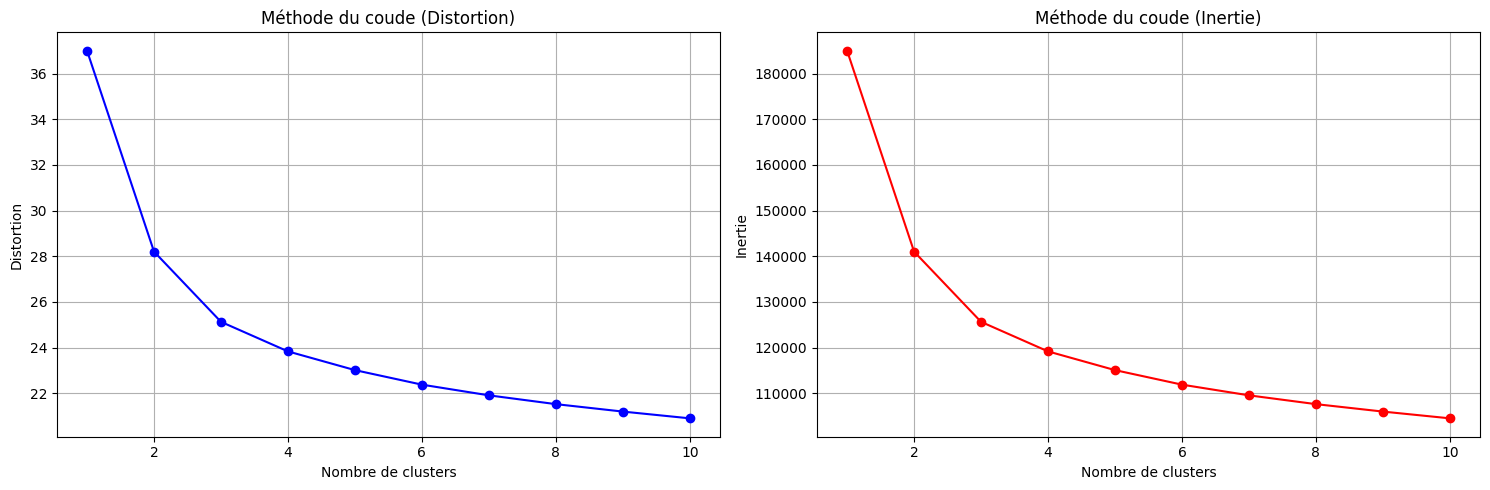


Variations relatives (en %):
De 1 à 2 clusters:
  Diminution de la distortion: 23.8%
  Diminution de l'inertie: 23.8%
De 2 à 3 clusters:
  Diminution de la distortion: 10.9%
  Diminution de l'inertie: 10.9%
De 3 à 4 clusters:
  Diminution de la distortion: 5.2%
  Diminution de l'inertie: 5.2%
De 4 à 5 clusters:
  Diminution de la distortion: 3.4%
  Diminution de l'inertie: 3.4%
De 5 à 6 clusters:
  Diminution de la distortion: 2.8%
  Diminution de l'inertie: 2.8%
De 6 à 7 clusters:
  Diminution de la distortion: 2.1%
  Diminution de l'inertie: 2.1%
De 7 à 8 clusters:
  Diminution de la distortion: 1.8%
  Diminution de l'inertie: 1.8%
De 8 à 9 clusters:
  Diminution de la distortion: 1.5%
  Diminution de l'inertie: 1.5%
De 9 à 10 clusters:
  Diminution de la distortion: 1.4%
  Diminution de l'inertie: 1.4%

Analyse des clusters pour les variables vertes:
Clusters: 1, Distortion: 26.00, Inertia: 130000.00
Clusters: 2, Distortion: 21.08, Inertia: 105389.85
Clusters: 3, Distortion: 18.88,

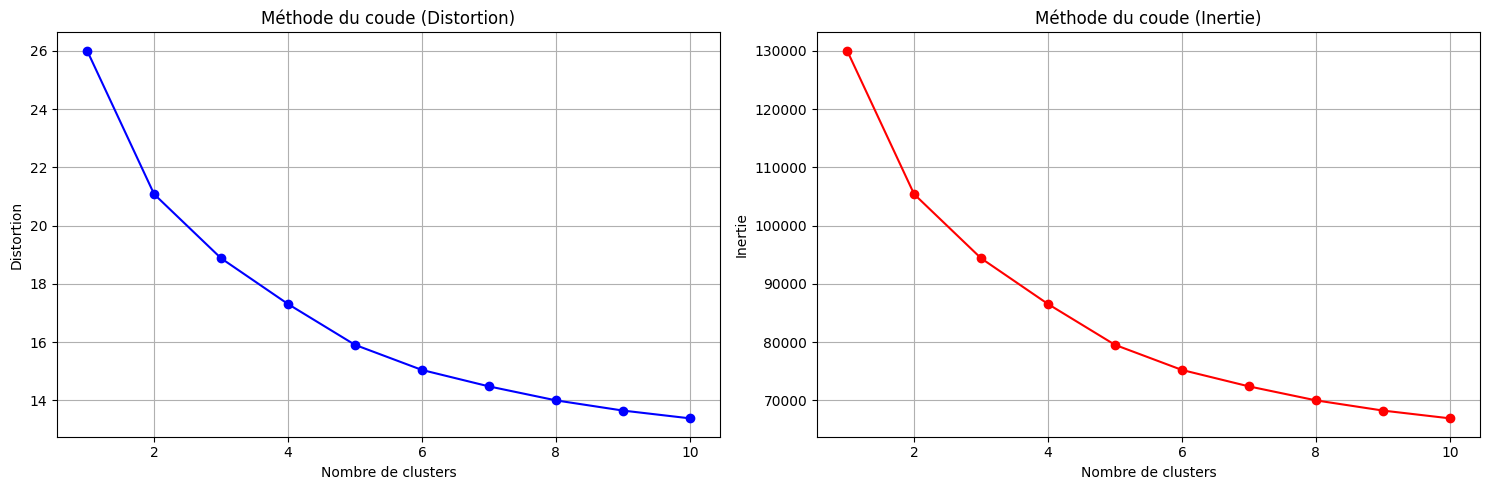


Variations relatives (en %):
De 1 à 2 clusters:
  Diminution de la distortion: 18.9%
  Diminution de l'inertie: 18.9%
De 2 à 3 clusters:
  Diminution de la distortion: 10.4%
  Diminution de l'inertie: 10.4%
De 3 à 4 clusters:
  Diminution de la distortion: 8.3%
  Diminution de l'inertie: 8.3%
De 4 à 5 clusters:
  Diminution de la distortion: 8.1%
  Diminution de l'inertie: 8.1%
De 5 à 6 clusters:
  Diminution de la distortion: 5.4%
  Diminution de l'inertie: 5.4%
De 6 à 7 clusters:
  Diminution de la distortion: 3.7%
  Diminution de l'inertie: 3.7%
De 7 à 8 clusters:
  Diminution de la distortion: 3.3%
  Diminution de l'inertie: 3.3%
De 8 à 9 clusters:
  Diminution de la distortion: 2.5%
  Diminution de l'inertie: 2.5%
De 9 à 10 clusters:
  Diminution de la distortion: 2.0%
  Diminution de l'inertie: 2.0%


In [8]:
def perform_clustering_with_tuning(data):
    # Stockage des scores pour différents nombres de clusters
    distortions = []
    inertias = []
    n_clusters_range = range(1, 11)  # Test de 1 à 10 clusters
    
    for n_clusters in n_clusters_range:
        kmeans = KMeans(
            n_clusters=n_clusters,
            init='k-means++',
            n_init=10,
            random_state=42
        )
        
        kmeans.fit(data)
        
        # Calcul de la distortion (somme des carrés des distances)
        distortion = sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean')**2, axis=1)) / data.shape[0]
        distortions.append(distortion)
        
        # Calcul de l'inertie
        inertias.append(kmeans.inertia_)
        
        print(f"Clusters: {n_clusters}, Distortion: {distortion:.2f}, Inertia: {kmeans.inertia_:.2f}")
    
    # Visualisation des courbes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot de la courbe de distortion (méthode du coude)
    ax1.plot(n_clusters_range, distortions, 'bo-')
    ax1.set_xlabel('Nombre de clusters')
    ax1.set_ylabel('Distortion')
    ax1.set_title('Méthode du coude (Distortion)')
    ax1.grid(True)
    
    # Plot de la courbe d'inertie (méthode du coude)
    ax2.plot(n_clusters_range, inertias, 'ro-')
    ax2.set_xlabel('Nombre de clusters')
    ax2.set_ylabel('Inertie')
    ax2.set_title('Méthode du coude (Inertie)')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Calcul des variations relatives pour aider à la décision
    distortion_variations = [-((distortions[i] - distortions[i-1])/distortions[i-1])*100 
                           for i in range(1, len(distortions))]
    inertia_variations = [-((inertias[i] - inertias[i-1])/inertias[i-1])*100 
                         for i in range(1, len(inertias))]
    
    print("\nVariations relatives (en %):")
    for k in range(len(distortion_variations)):
        print(f"De {k+1} à {k+2} clusters:")
        print(f"  Diminution de la distortion: {distortion_variations[k]:.1f}%")
        print(f"  Diminution de l'inertie: {inertia_variations[k]:.1f}%")

# Exécuter pour les données orange
print("Analyse des clusters pour les variables orange:")
perform_clustering_with_tuning(data_orange_scaled)

# Exécuter pour les données vertes
print("\nAnalyse des clusters pour les variables vertes:")
perform_clustering_with_tuning(data_vert_scaled)

Attention ici le code n'est lancé que sur les variables orange


Comparaison des prétraitements avec différentes métriques:

Sans standardisation:
Essai de différents algorithmes de clustering:

1. Gaussian Mixture Model:
   2 composants:
      Silhouette = 0.005
      Calinski-Harabasz = 52.864
      Davies-Bouldin = 9.020
   3 composants:
      Silhouette = 0.088
      Calinski-Harabasz = 586.397
      Davies-Bouldin = 2.525
   4 composants:
      Silhouette = 0.006
      Calinski-Harabasz = 435.064
      Davies-Bouldin = 9.667
   5 composants:
      Silhouette = 0.002
      Calinski-Harabasz = 307.159
      Davies-Bouldin = 8.554

2. DBSCAN:

3. Hierarchical Clustering:
   2 clusters, ward:
      Silhouette = 0.205
      Calinski-Harabasz = 1321.145
      Davies-Bouldin = 1.715
   2 clusters, complete:
      Silhouette = 0.176
      Calinski-Harabasz = 1424.397
      Davies-Bouldin = 1.795
   2 clusters, average:
      Silhouette = 0.316
      Calinski-Harabasz = 3.005
      Davies-Bouldin = 0.545
   3 clusters, ward:
      Silhouette = 0.108
   

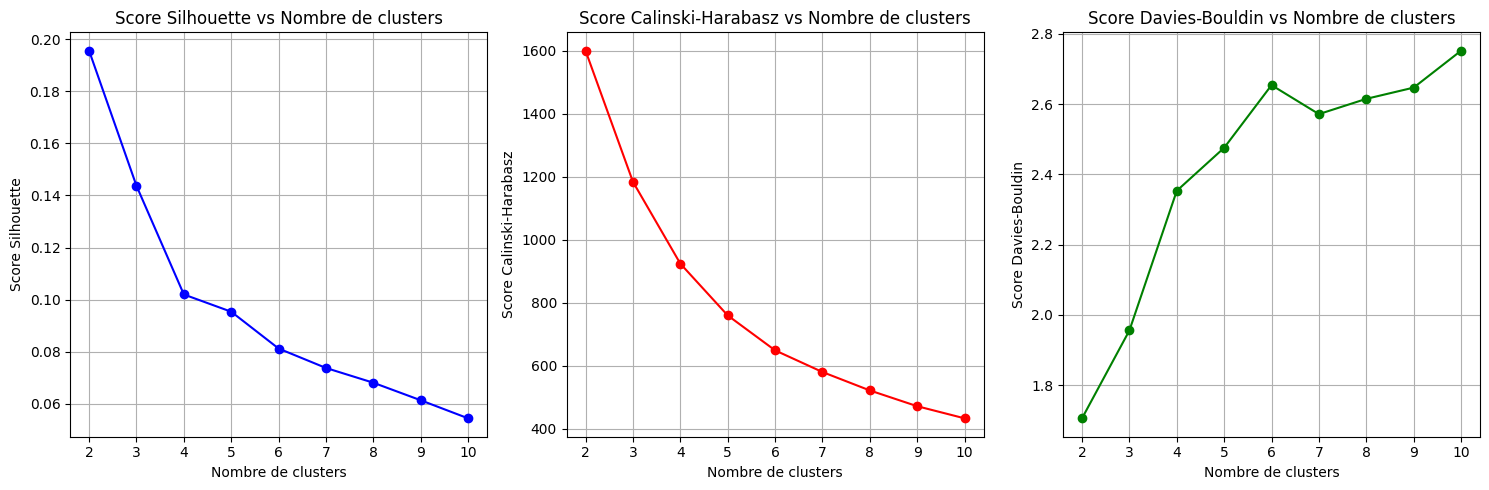

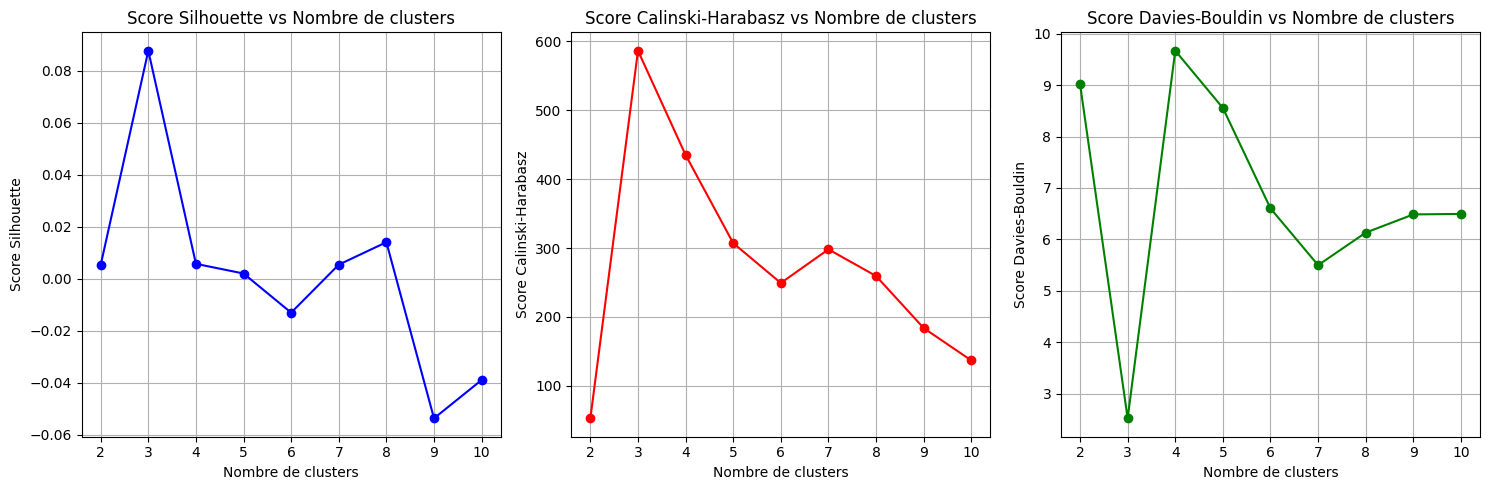

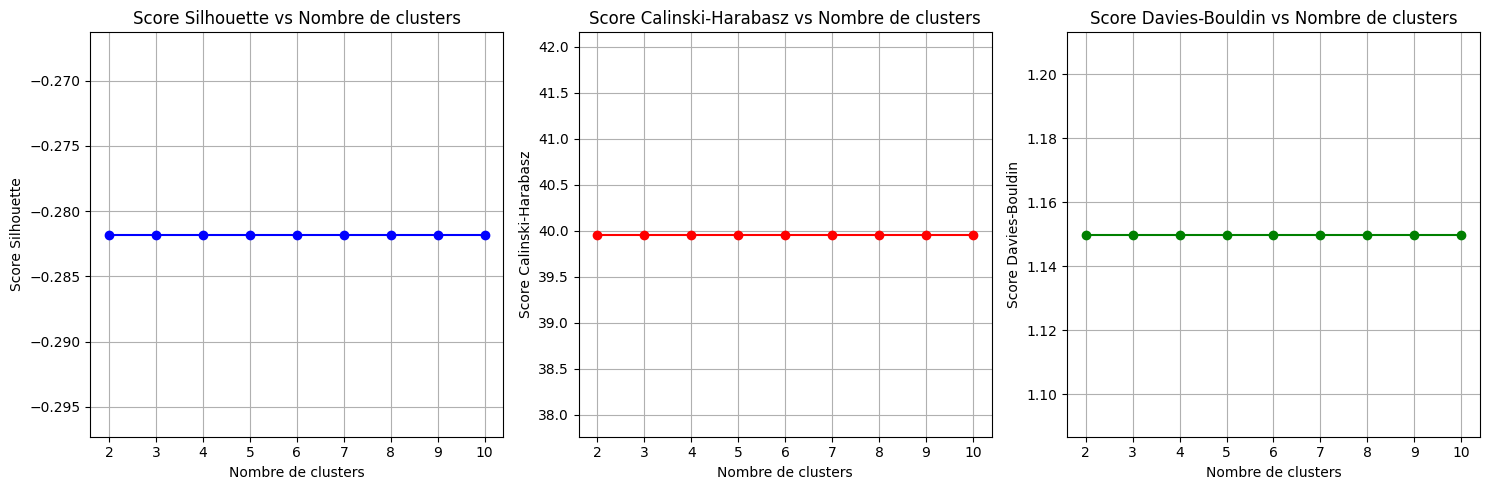

In [36]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN, AgglomerativeClustering

def evaluate_clustering(data, labels):
    """
    Calcule plusieurs métriques d'évaluation pour le clustering
    """
    if len(np.unique(labels)) < 2:  # Si moins de 2 clusters, certaines métriques ne fonctionnent pas
        return None
    
    # Éviter les labels -1 (noise) pour certaines métriques
    if -1 in labels:
        return None
        
    metrics = {
        'silhouette': silhouette_score(data, labels),
        'calinski': calinski_harabasz_score(data, labels),
        'davies': davies_bouldin_score(data, labels)
    }
    return metrics

def try_different_clustering(data):
    print("Essai de différents algorithmes de clustering:\n")
    
    # 1. Gaussian Mixture Model
    print("1. Gaussian Mixture Model:")
    for n_components in range(2, 6):
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        clusters = gmm.fit_predict(data)
        metrics = evaluate_clustering(data, clusters)
        if metrics:
            print(f"   {n_components} composants:")
            print(f"      Silhouette = {metrics['silhouette']:.3f}")
            print(f"      Calinski-Harabasz = {metrics['calinski']:.3f}")
            print(f"      Davies-Bouldin = {metrics['davies']:.3f}")
    
    # 2. DBSCAN
    print("\n2. DBSCAN:")
    eps_values = [0.5, 1, 1.5, 2]
    min_samples_values = [5, 10, 15]
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(data)
            metrics = evaluate_clustering(data, clusters)
            if metrics:
                n_clusters = len(np.unique(clusters))
                print(f"   eps={eps}, min_samples={min_samples} ({n_clusters} clusters):")
                print(f"      Silhouette = {metrics['silhouette']:.3f}")
                print(f"      Calinski-Harabasz = {metrics['calinski']:.3f}")
                print(f"      Davies-Bouldin = {metrics['davies']:.3f}")
    
    # 3. Hierarchical Clustering
    print("\n3. Hierarchical Clustering:")
    for n_clusters in range(2, 6):
        for linkage in ['ward', 'complete', 'average']:
            hc = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
            clusters = hc.fit_predict(data)
            metrics = evaluate_clustering(data, clusters)
            if metrics:
                print(f"   {n_clusters} clusters, {linkage}:")
                print(f"      Silhouette = {metrics['silhouette']:.3f}")
                print(f"      Calinski-Harabasz = {metrics['calinski']:.3f}")
                print(f"      Davies-Bouldin = {metrics['davies']:.3f}")

# Essayer différentes approches de prétraitement
print("Comparaison des prétraitements avec différentes métriques:\n")

# 1. Données brutes
data_raw = data[variables_orange]
print("Sans standardisation:")
try_different_clustering(data_raw)

# 2. Avec StandardScaler
print("\nAvec StandardScaler:")
try_different_clustering(data_orange_scaled)

# 3. Avec RobustScaler
from sklearn.preprocessing import RobustScaler
data_robust = RobustScaler().fit_transform(data[variables_orange])
print("\nAvec RobustScaler:")
try_different_clustering(data_robust)

# 4. Avec MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
data_minmax = MinMaxScaler().fit_transform(data[variables_orange])
print("\nAvec MinMaxScaler:")
try_different_clustering(data_minmax)

# 5. Avec PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_orange)
print(f"\nAvec PCA (nombre de composantes: {data_pca.shape[1]}):")
try_different_clustering(data_pca)

# Visualisation des résultats pour différents nombres de clusters
def plot_metrics_comparison(data, model_name="KMeans"):
    n_clusters_range = range(2, 11)
    silhouette_scores = []
    calinski_scores = []
    davies_scores = []
    
    for n_clusters in n_clusters_range:
        if model_name == "KMeans":
            model = KMeans(n_clusters=n_clusters, random_state=42)
        elif model_name == "GaussianMixture":
            model = GaussianMixture(n_components=n_clusters, random_state=42)
        elif model_name == "DBSCAN":
            model = DBSCAN(eps=0.5, min_samples=5)
        labels = model.fit_predict(data)
        
        silhouette_scores.append(silhouette_score(data, labels))
        calinski_scores.append(calinski_harabasz_score(data, labels))
        davies_scores.append(davies_bouldin_score(data, labels))
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    ax1.plot(n_clusters_range, silhouette_scores, 'bo-')
    ax1.set_xlabel('Nombre de clusters')
    ax1.set_ylabel('Score Silhouette')
    ax1.set_title('Score Silhouette vs Nombre de clusters pour le modèle ' + model_name)
    ax1.grid(True)
    
    ax2.plot(n_clusters_range, calinski_scores, 'ro-')
    ax2.set_xlabel('Nombre de clusters')
    ax2.set_ylabel('Score Calinski-Harabasz')
    ax2.set_title('Score Calinski-Harabasz vs Nombre de clusters pour le modèle ' + model_name)
    ax2.grid(True)
    
    ax3.plot(n_clusters_range, davies_scores, 'go-')
    ax3.set_xlabel('Nombre de clusters')
    ax3.set_ylabel('Score Davies-Bouldin')
    ax3.set_title('Score Davies-Bouldin vs Nombre de clusters pour le modèle ' + model_name)
    ax3.grid(True)
    
    plt.tight_layout()
    plt.show()

# Visualiser les métriques pour les données standardisées
plot_metrics_comparison(data_orange, "KMeans")
plot_metrics_comparison(data_orange, "GaussianMixture")
plot_metrics_comparison(data_orange, "DBSCAN")



Le DBSCAN ici ne fonctionne pas du tout car peut être que les données ne sont pas suffisantes ou de trop grande dimension.


Analyse hiérarchique des données orange:


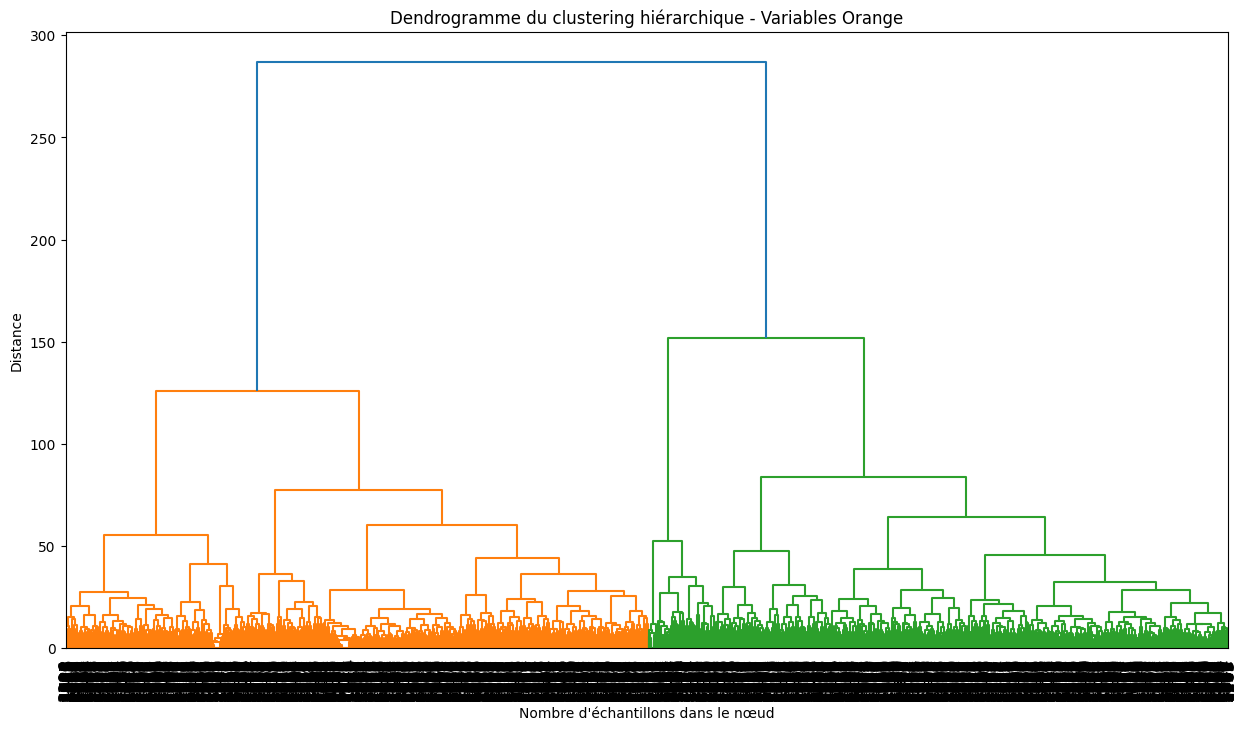


Pour 2 clusters:
Score silhouette moyen : 0.174

Description des clusters:

Cluster 1 (2508 individus):
Caractéristiques distinctives:
- A11_10_slice: 0.56 écarts-types inférieure à la moyenne
- A9_4_slice: 0.56 écarts-types inférieure à la moyenne
- A9_8_slice: 0.56 écarts-types inférieure à la moyenne
- A11_11_slice: 0.56 écarts-types inférieure à la moyenne
- A9_3_slice: 0.56 écarts-types inférieure à la moyenne

Cluster 2 (2492 individus):
Caractéristiques distinctives:
- A11_10_slice: 0.57 écarts-types supérieure à la moyenne
- A9_4_slice: 0.56 écarts-types supérieure à la moyenne
- A9_8_slice: 0.56 écarts-types supérieure à la moyenne
- A11_11_slice: 0.56 écarts-types supérieure à la moyenne
- A9_3_slice: 0.56 écarts-types supérieure à la moyenne

Pour 3 clusters:
Score silhouette moyen : 0.143

Description des clusters:

Cluster 1 (2508 individus):
Caractéristiques distinctives:
- A11_10_slice: 0.56 écarts-types inférieure à la moyenne
- A9_4_slice: 0.56 écarts-types inférieure

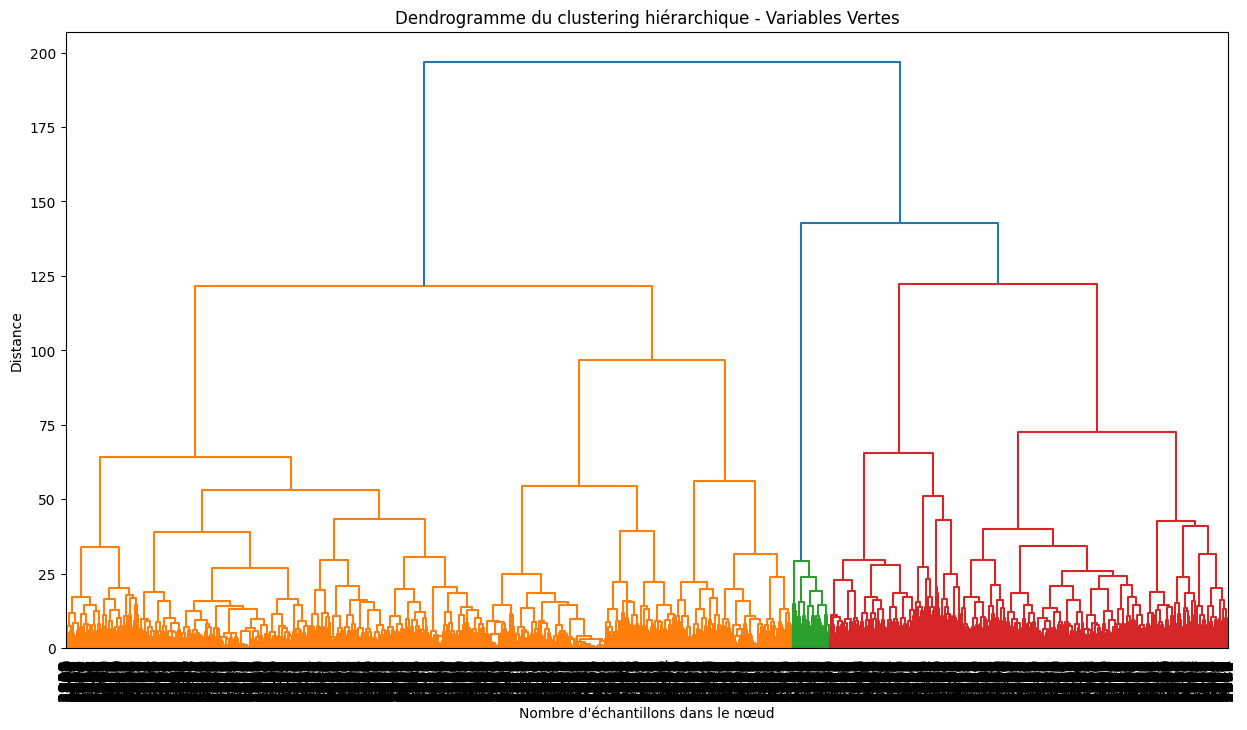


Pour 2 clusters:
Score silhouette moyen : 0.174

Description des clusters:

Cluster 1 (3126 individus):
Caractéristiques distinctives:

Cluster 2 (1874 individus):
Caractéristiques distinctives:
- C1_9_slice: 0.72 écarts-types inférieure à la moyenne
- C1_1_slice: 0.69 écarts-types inférieure à la moyenne
- C1_8_slice: 0.69 écarts-types inférieure à la moyenne
- C1_7_slice: 0.67 écarts-types inférieure à la moyenne
- C1_3_slice: 0.66 écarts-types inférieure à la moyenne

Pour 3 clusters:
Score silhouette moyen : 0.159

Description des clusters:

Cluster 1 (3126 individus):
Caractéristiques distinctives:

Cluster 2 (162 individus):
Caractéristiques distinctives:
- C1_6_slice: 3.57 écarts-types inférieure à la moyenne
- C1_4_slice: 3.21 écarts-types inférieure à la moyenne
- C1_7_slice: 3.20 écarts-types inférieure à la moyenne
- C1_3_slice: 3.18 écarts-types inférieure à la moyenne
- C1_8_slice: 2.77 écarts-types inférieure à la moyenne

Cluster 3 (1712 individus):
Caractéristiques dis

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

def perform_hierarchical_clustering(data, variables, title):
    # Calcul de la matrice de liaison
    linkage_matrix = linkage(data, method='ward')
    
    # Création de la figure
    plt.figure(figsize=(15, 8))
    
    # Création du dendrogramme
    dendrogram(linkage_matrix,
              orientation='top',
              show_leaf_counts=True,
              leaf_rotation=90.,
              leaf_font_size=12.,
              show_contracted=True)
    
    plt.title(f'Dendrogramme du clustering hiérarchique - {title}')
    plt.xlabel('Nombre d\'échantillons dans le nœud')
    plt.ylabel('Distance')
    plt.show()
    
    # Test de différents nombres de clusters
    n_clusters_range = range(2, 11)
    clusters_dict = {}
    
    for n in n_clusters_range:
        # Création des clusters
        clusters = fcluster(linkage_matrix, n, criterion='maxclust')
        clusters_dict[n] = clusters
        
        # Calcul du score silhouette
        silhouette_avg = silhouette_score(data, clusters)
        
        print(f"\nPour {n} clusters:")
        print(f"Score silhouette moyen : {silhouette_avg:.3f}")
        
        # Description des clusters
        print("\nDescription des clusters:")
        for i in range(1, n+1):  # fcluster commence à 1, pas 0
            cluster_data = data[clusters == i]
            print(f"\nCluster {i} ({len(cluster_data)} individus):")
            
            # Calculer les moyennes des variables pour ce cluster
            cluster_means = np.mean(cluster_data, axis=0)
            global_means = np.mean(data, axis=0)
            
            # Identifier les caractéristiques distinctives
            distinctive_features = []
            for j, (c_mean, g_mean, var_name) in enumerate(zip(cluster_means, global_means, variables)):
                diff = c_mean - g_mean
                if abs(diff) > 0.5:  # Seuil arbitraire
                    distinctive_features.append((var_name, diff))
            
            # Trier et afficher les caractéristiques les plus distinctives
            distinctive_features.sort(key=lambda x: abs(x[1]), reverse=True)
            print("Caractéristiques distinctives:")
            for var_name, diff in distinctive_features[:5]:
                direction = "supérieure" if diff > 0 else "inférieure"
                print(f"- {var_name}: {abs(diff):.2f} écarts-types {direction} à la moyenne")
    
    return clusters_dict

# Application aux données orange
print("Analyse hiérarchique des données orange:")
clusters_dict_orange = perform_hierarchical_clustering(data_orange_scaled, variables_orange, "Variables Orange")

# Application aux données vertes
print("\nAnalyse hiérarchique des données vertes:")
clusters_dict_vert = perform_hierarchical_clustering(data_vert_scaled, variables_vert, "Variables Vertes")

# Comparaison avec K-means
def compare_clustering_methods(data, kmeans_clusters, hierarchical_clusters):
    """Compare les résultats entre K-means et le clustering hiérarchique"""
    adjusted_rand = adjusted_rand_score(kmeans_clusters, hierarchical_clusters)
    nmi = normalized_mutual_info_score(kmeans_clusters, hierarchical_clusters)
    
    print(f"Adjusted Rand Index: {adjusted_rand:.3f}")
    print(f"Normalized Mutual Information: {nmi:.3f}")

# Comparaison pour un nombre spécifique de clusters (par exemple, 4)
n_clusters = 4
print("\nComparaison des méthodes de clustering pour les données orange (4 clusters):")
compare_clustering_methods(data_orange_scaled, 
                         clusters_orange,  # résultats de K-means
                         clusters_dict_orange[n_clusters]-1)  # -1 car fcluster commence à 1

print("\nComparaison des méthodes de clustering pour les données vertes (4 clusters):")
compare_clustering_methods(data_vert_scaled,
                         clusters_vert,
                         clusters_dict_vert[n_clusters]-1)

Le clustering hiérarchique est très intéressant car il permet de voir les clusters et de les décrire.
Mais il ne fait pas mieux en terme de silhouette que le KMeans.
Nous l'abandonnons donc par la suite de par sa difficulté à interpréter et à manipuler.
